In [48]:
import glob
import pandas as pd
import json
import requests

In [49]:
# Load datasets
df = pd.read_csv(r'C:\Users\Pragadheesh\Downloads\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
df1 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"C:\Users\Pragadheesh\Downloads\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

# Display the DataFrames
print("DataFrame 1:")
print(df.head())
print(df.shape)

print("\nDataFrame 2:")
print(df1.head())
print(df1.shape)

print("\nDataFrame 3:")
print(df2.head())
print(df2.shape)

print("\nDataFrame 4:")
print(df3.head())
print(df3.shape)

print("\nDataFrame 5:")
print(df4.head())
print(df4.shape)

DataFrame 1:
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            68.0  New Generation                 1980   62 years 01 month   
4            67.0  New Generation                 1980  62 years 05 months   

   resale_price  
0      232000.0  
1      250000.0  
2      262000.0  
3

In [54]:
# Merging DataFrames (assuming they share common columns)
merge_df = pd.concat([df, df1, df2, df3, df4], ignore_index=True)

In [55]:
# Reset the index
merge_df.reset_index(drop=True, inplace=True)

In [56]:
# Display columns and head of DataFrame
print("Columns:", merge_df.columns)
print("\nDataFrame Head:")
print(merge_df.head())

Columns: Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

DataFrame Head:
     month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    2 ROOM   406  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    3 ROOM   108   ANG MO KIO AVE 4     01 TO 03   
2  2017-01  ANG MO KIO    3 ROOM   602   ANG MO KIO AVE 5     01 TO 03   
3  2017-01  ANG MO KIO    3 ROOM   465  ANG MO KIO AVE 10     04 TO 06   
4  2017-01  ANG MO KIO    3 ROOM   601   ANG MO KIO AVE 5     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date     remaining_lease  \
0            44.0        Improved                 1979  61 years 04 months   
1            67.0  New Generation                 1978  60 years 07 months   
2            67.0  New Generation                 1980  62 years 05 months   
3            

In [57]:
merge_df.shape

(914455, 11)

In [58]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914455 entries, 0 to 914454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                914455 non-null  object 
 1   town                 914455 non-null  object 
 2   flat_type            914455 non-null  object 
 3   block                914455 non-null  object 
 4   street_name          914455 non-null  object 
 5   storey_range         914455 non-null  object 
 6   floor_area_sqm       914455 non-null  float64
 7   flat_model           914455 non-null  object 
 8   lease_commence_date  914455 non-null  int64  
 9   remaining_lease      205405 non-null  object 
 10  resale_price         914455 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 76.7+ MB


In [59]:
# Assuming 'month' is a datetime column, you can convert it if needed
merge_df['month'] = pd.to_datetime(merge_df['month'])

In [60]:
merge_df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease        709050
resale_price                0
dtype: int64

In [61]:
# droping remaining_lease missing values
merge_df = merge_df.dropna()
merge_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [62]:
merge_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [63]:
list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station',
    'Woodlands North MRT Station',
    'Woodlands South MRT Station'
]

In [64]:
len(list_of_mrt)

122

In [65]:
mrt_lat = [ 1.33329506563598,
            1.3487108105756,
            1.35861159094192,
            1.38536316540225,
            1.39757979021386, 
            1.42508698073648,
            1.43252114855026, 
            1.43605761708128, 
            1.44058856161847, 
            1.44905082158502, 
            1.44307664075699, 
            1.42944308477331, 
            1.41738337009565, 
            1.38168259989517, 
            1.36993284962264, 
            1.35131580146658, 
            1.3404690010277, 
            1.33259672794159, 
            1.32044079120154, 
            1.3123189224097, 
            1.30242224836722, 
            1.30026416739006, 
            1.29868872290409, 
            1.29298990728295, 
            1.28393326207164, 
            1.27642735476716, 
            1.27102703612006, 
            1.37304331635804, 
            1.34551530560119, 
            1.34319707851829, 
            1.32718729074675, 
            1.32040148729112, 
            1.3210381335934, 
            1.31978354916088, 
            1.31719911972353, 
            1.3164326118157, 
            1.31148890998818, 
            1.30737781747063, 
            1.30046508509717, 
            1.27656131737246, 
            1.27973970679335, 
            1.28610253588403, 
            1.28963453412887,
            1.29455085184931, 
            1.30250199924325, 
            1.3072237082044, 
            1.31140529320963, 
            1.31511625277378, 
            1.34235282081401, 
            1.34425911493819, 
            1.33861033900695, 
            1.33758701106708, 
            1.3277170408447, 
            1.31947090075208, 
            1.32102695598684, 
            1.32998504653102, 
            1.34088242451105, 
            1.33538252614956, 
            1.35747897447692, 
            1.26538938374901, 
            1.28422391919085, 
            1.28838602407588, 
            1.30724381608438, 
            1.31190557325774, 
            1.31959679168634, 
            1.3318797140041, 
            1.33919004519388, 
            1.35063361526525, 
            1.36017917065237, 
            1.37129226620797, 
            1.38287001971672, 
            1.39169462601522, 
            1.41492733388605, 
            1.2967526221395, 
            1.2936577245386, 
            1.29399798636232, 
            1.29976684675139, 
            1.3028124684707, 
            1.30620190525331, 
            1.30854798388121, 
            1.32615024457361, 
            1.33514564170352, 
            1.34250117805245, 
            1.35153128621585, 
            1.348707263451, 
            1.33724561271722, 
            1.32211373558877, 
            1.31743915158967, 
            1.31226422601049, 
            1.29973599364922,
            1.29353698622126,
            1.28260725045254,
            1.27621352233766, 
            1.27225417749656, 
            1.27070647717762, 
            1.28187378879209, 
            1.37900211641036,
            1.36981544925552,
            1.36234486803558,
            1.34122317558549, 
            1.335893496278, 
            1.33096058134451, 
            1.32639224146351, 
            1.32006555750626, 
            1.30385218527656, 
            1.27944638178916, 
            1.28206894769394, 
            1.29248194822996, 
            1.29891843369422, 
            1.3051713878069, 
            1.31367252847691, 
            1.32130110228321, 
            1.32687671501334, 
            1.32997425973974, 
            1.33496735995428, 
            1.33474211664091, 
            1.33660782955099, 
            1.3456336579777, 
            1.35619148271544,
            1.34173977444995,
            1.44778217342648, 
            1.42748811362716
]

In [66]:
len(mrt_lat)

122

In [67]:
mrt_long = [103.742153884191,
            103.749334517338,
            103.751790910733,
            103.744370779756,
            103.747459490883,
            103.762137459497,
            103.774074641403,
            103.787938777173,
            103.800990519771,
            103.820046140211,
            103.829702590959,
            103.835005047246,
            103.832979908243,
            103.844991053696,
            103.849558091776,
            103.84914026532,
            103.846799083148,
            103.847577286075,
            103.843825618748,
            103.837984594021,
            103.823868523249,
            103.839085753124,
            103.846179896647,
            103.852542630611,
            103.851463066756,
            103.854597776754,
            103.862447515736,
            103.949284527763,
            103.938436971222,
            103.953377214378,
            103.946348600798,
            103.957183823478,
            103.912947930851,
            103.903225807255,
            103.8923648823,
            103.882906044385,
            103.871386541754,
            103.862767633888,
            103.855706730933,
            103.845725186759,
            103.839513521005,
            103.827445112691,
            103.81674097205,
            103.806077155982,
            103.798228523336,
            103.790253514502,
            103.778637841909,
            103.765191452888,
            103.732596738363,
            103.720949087456,
            103.706084900902,
            103.697321608474,
            103.678374996165,
            103.660530461345,
            103.649078235627,
            103.639616648771,
            103.636991425128,
            103.962374747451,
            103.98788356959,
            103.821530157095,
            103.845143798953,
            103.846555209694,
            103.849841614124,
            103.853477716509,
            103.861750715496,
            103.869057877586,
            103.87081830915,
            103.872771660431,
            103.885064856353,
            103.892380513029,
            103.893122569706,
            103.895484694279,
            103.910166388177,
            103.850918752694,
            103.855081226245,
            103.860350000188,
            103.86363696572,
            103.875337711089,
            103.882528081052,
            103.889064718377,
            103.889298600376,
            103.888336109832,
            103.880177899184,
            103.864812169514,
            103.839423132332,
            103.840161782075,
            103.814984510627,
            103.807379214161,
            103.796470444998,
            103.787472120061,
            103.784572366867,
            103.781795517386,
            103.791350313288,
            103.802631578766,
            103.809761611219,
            103.859079764874,
            103.761535114929,
            103.76443921414,
            103.767418254007,
            103.775794285083,
            103.783235863233,
            103.796969279733,
            103.806548201692,
            103.826024401924,
            103.852769428884,
            103.852840829581,
            103.848648781083,
            103.844331362465,
            103.850353762717,
            103.855295713435,
            103.862977620945,
            103.871622627142,
            103.883247509542,
            103.899226655439,
            103.908459338046,
            103.91797832995,
            103.932234623286,
            103.938492495285,
            103.9546344625,
            103.961472788634,
            103.7851355073,
            103.792729941333
]
len(mrt_long)

122

In [69]:
mrt_location = pd.DataFrame({
    'MRT': list_of_mrt,
    'latitude': mrt_lat,
    'longitude': mrt_long
})

In [70]:
mrt_location.head()

,MRT,latitude,longitude
0,Jurong East MRT Station,1.333295,103.742154
1,Bukit Batok MRT Station,1.348711,103.749335
2,Bukit Gombak MRT Station,1.358612,103.751791
3,Choa Chu Kang MRT Station,1.385363,103.744371
4,Yew Tee MRT Station,1.397580,103.747459


In [71]:
mrt_location.to_csv('Singapore_MRT.csv',index=False)

In [73]:
merge_df.loc[:, 'address'] = merge_df['block'] + " " + merge_df['street_name']

In [74]:
merge_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5
...,...,...,...,...,...,...,...,...,...,...,...,...
914450,2016-12-01,YISHUN,5 ROOM,297,YISHUN ST 20,13 TO 15,112.0,Improved,2000,82,488000.0,297 YISHUN ST 20
914451,2016-12-01,YISHUN,5 ROOM,838,YISHUN ST 81,01 TO 03,122.0,Improved,1987,69,455000.0,838 YISHUN ST 81
914452,2016-12-01,YISHUN,EXECUTIVE,664,YISHUN AVE 4,10 TO 12,181.0,Apartment,1992,74,778000.0,664 YISHUN AVE 4
914453,2016-12-01,YISHUN,EXECUTIVE,325,YISHUN CTRL,01 TO 03,146.0,Maisonette,1988,70,575000.0,325 YISHUN CTRL


In [75]:
address_list = merge_df['address'].unique()

In [76]:
address_list

array(['406 ANG MO KIO AVE 10', '108 ANG MO KIO AVE 4',
       '602 ANG MO KIO AVE 5', ..., '659 YISHUN AVE 4', '271 BANGKIT RD',
       '802 FRENCH RD'], dtype=object)

In [77]:
import requests

latitude = []
longitude = []        # initialize empty lists to store the geolocation information retrieved from the OneMap API.
blk_no = []
road_name = []
postal_code = []
address = []
count = 0          # Initializes a counter variable

for row in range(len(address_list)):    # Iterates through each address in the address_list
    
    query_address = address_list[row]    # # Takes the current address from the address_list for querying
    
    query_string='https://www.onemap.gov.sg/api/common/elastic/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'    # Constructs the API query URL with the current address
    
    resp = requests.get(query_string)    # Sends a GET request to the OneMap API with the constructed query URL.


    data_geo_location=json.loads(resp.content)    # Parses the JSON response from the OneMap API.
    
    if data_geo_location['found'] != 0:    #  Checks if the API response indicates that a location was found.
        
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])   # Append the values to the list
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        print (str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
        
    else:
        print ("No Results")


406 ANG MO KIO AVE 10 ,Lat: 1.36200453938712 Long: 103.853879910407
108 ANG MO KIO AVE 4 ,Lat: 1.37096635222625 Long: 103.838201940326
602 ANG MO KIO AVE 5 ,Lat: 1.38070883044887 Long: 103.835368226602
465 ANG MO KIO AVE 10 ,Lat: 1.3662010408294 Long: 103.857200967235
601 ANG MO KIO AVE 5 ,Lat: 1.38104135523576 Long: 103.835131742647
150 ANG MO KIO AVE 5 ,Lat: 1.37680678506745 Long: 103.842017962576
447 ANG MO KIO AVE 10 ,Lat: 1.36747901420817 Long: 103.855967139125
218 ANG MO KIO AVE 1 ,Lat: 1.36511907555698 Long: 103.841742483384
571 ANG MO KIO AVE 3 ,Lat: 1.37005500420092 Long: 103.854880566919
534 ANG MO KIO AVE 10 ,Lat: 1.37405846295585 Long: 103.854168170426
233 ANG MO KIO AVE 3 ,Lat: 1.36754924977907 Long: 103.836740628478
235 ANG MO KIO AVE 3 ,Lat: 1.36682360872342 Long: 103.83649123351
219 ANG MO KIO AVE 1 ,Lat: 1.36598198004505 Long: 103.840654039612
536 ANG MO KIO AVE 10 ,Lat: 1.37447378519738 Long: 103.854100515826
230 ANG MO KIO AVE 3 ,Lat: 1.36885445228086 Long: 103.83789

ReadTimeout: HTTPSConnectionPool(host='www.onemap.gov.sg', port=443): Read timed out. (read timeout=None)

In [82]:
! pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
     ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   -

In [78]:
#Getting the distance with the help of OpenMap API
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no,
    'road_name': road_name,
    'postal_code': postal_code,
    'address': address
})
len(df_coordinates)

450

In [79]:
list_of_lat = df_coordinates['latitude']
list_of_long = df_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']

In [80]:
list_of_coordinates = []      #  empty list to store pairs of latitude and longitude.
list_of_mrt_coordinates = []  #  empty list to store pairs of latitude and longitude specifically for MRT (Mass Rapid Transit) locations.

for lat, long in zip(list_of_lat, list_of_long):   # iterates over pairs of latitude and longitude using the zip function, it appends a tuple (lat, long)
    list_of_coordinates.append((lat,long))
for lat, long in zip(mrt_lat, mrt_long):         # iterates over pairs of latitude and longitude specifically for MRT locations using the zip function, it appends a tuple (lat, long)
    list_of_mrt_coordinates.append((lat, long))

In [83]:
# Distance to nearest MRT
# To calculate the minimum geodesic distance between each pair of coordinates from list_of_coordinates and a set of MRT coordinates from list_of_mrt_coordinates

from geopy.distance import geodesic  # To calculate geodesic distances between two points on the Earth.

list_of_dist_mrt = []   # To store the geodesic distances between a specific origin point and all MRT coordinates
min_dist_mrt = []      #  To store the minimum distances for each origin point.

for origin in list_of_coordinates:   # Treating each pair as an origin point.
    
    for destination in range(0, len(list_of_mrt_coordinates)):   # Treating it as a destination point.
        
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)  # Calculates the geodesic distance between the current origin point and the current MRT destination point using the geodesic function, appends the distance in meters.
        
    shortest = (min(list_of_dist_mrt))    #  Finds the minimum distance from list_of_dist_mrt using the min function and assigns it to the variable shortest.
    
    min_dist_mrt.append(shortest)   #  Appends the minimum distance for the current origin point to the min_dist_mrt list.
    
    list_of_dist_mrt.clear()   # Clears the list_of_dist_mrt list to prepare it for the next iteration of the outer loop.


In [84]:
#CBD typically refers to the "Central Business District." 
#It is the commercial and business center of a city, often characterized by a concentration of offices, 
#financial institutions, government buildings, and other businesses. The CBD is a key area for economic activities, and it usually features a high density of skyscrapers and commercial structures.
# Distance from Central Business District (CBD)

cbd_dist = []    # geodesic distances between each coordinate pair in list_of_coordinates and the CBD

for origin in list_of_coordinates:  # treating each pair as an origin point
    
    cbd_dist.append(geodesic(origin,(1.2830, 103.8513)).meters) #CBD coordinates

min_dist_mrt is a list that stores the minimum geodesic distance from each point in list_of_coordinates to any of the MRT coordinates in list_of_mrt_coordinates. The code iterates through each coordinate in list_of_coordinates, calculates the geodesic distances to all MRT coordinates, finds the minimum distance, and appends it to the min_dist_mrt list.

cbd_dist is a list that stores the geodesic distance from each point in list_of_coordinates to a fixed point representing the coordinates of the Central Business District (CBD). The code iterates through each coordinate in list_of_coordinates and calculates the geodesic distance to the CBD coordinates (1.2830, 103.8513), appending each distance to the cbd_dist list.

In [85]:
# Put MRT and CBD distance together

df_coordinates['cbd_dist'] = cbd_dist
df_coordinates['min_dist_mrt'] = min_dist_mrt

In [86]:
df_coordinates

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt
0,1.36200453938712,103.853879910407,406,ANG MO KIO AVENUE 10,560406,406 ANG MO KIO AVE 10,8740.633473,999.941595
1,1.37096635222625,103.838201940326,108,ANG MO KIO AVENUE 4,560108,108 ANG MO KIO AVE 4,9835.486576,1268.958162
2,1.38070883044887,103.835368226602,602,ANG MO KIO AVENUE 5,560602,602 ANG MO KIO AVE 5,10948.659905,1076.298560
3,1.3662010408294,103.857200967235,465,ANG MO KIO AVENUE 10,560465,465 ANG MO KIO AVE 10,9223.353648,945.371837
4,1.38104135523576,103.835131742647,601,ANG MO KIO AVENUE 5,560601,601 ANG MO KIO AVE 5,10989.223687,1099.505343
...,...,...,...,...,...,...,...,...
445,1.33701100762294,103.738787314099,101,JURONG EAST STREET 13,600101,101 JURONG EAST ST 13,13872.938329,556.060626
446,1.33866911059386,103.740292528065,211,JURONG EAST STREET 21,600211,211 JURONG EAST ST 21,13802.710413,629.305418
447,1.34953251705686,103.731532178493,339,JURONG EAST AVENUE 1,600339,339 JURONG EAST AVE 1,15224.488018,802.685429
448,1.32149903397958,103.738982186646,62,TEBAN GARDENS ROAD,600062,62 TEBAN GDNS RD,13204.965217,1351.261735


In [87]:
df_coordinates.to_csv('df_coordinates.csv',index=False)

In [88]:
df_coordinates = pd.read_csv('df_coordinates.csv')

In [96]:
df_new = df_coordinates.merge(merge_df, on="address", how='outer')
df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,1.362005,103.85388,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,1.362005,103.85388,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0
2,1.362005,103.85388,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0
3,1.362005,103.85388,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0
4,1.362005,103.85388,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205400,NaN,NaN,NaN,NaN,NaN,201 CHOA CHU KANG AVE 1,NaN,NaN,2016-09-01,CHOA CHU KANG,4 ROOM,201,CHOA CHU KANG AVE 1,01 TO 03,108.0,Model A,1989,72,340000.0
205401,NaN,NaN,NaN,NaN,NaN,121 MARSILING RISE,NaN,NaN,2016-10-01,WOODLANDS,EXECUTIVE,121,MARSILING RISE,04 TO 06,170.0,Apartment,1995,77,670000.0
205402,NaN,NaN,NaN,NaN,NaN,659 YISHUN AVE 4,NaN,NaN,2016-10-01,YISHUN,4 ROOM,659,YISHUN AVE 4,04 TO 06,89.0,Simplified,1987,69,335000.0
205403,NaN,NaN,NaN,NaN,NaN,271 BANGKIT RD,NaN,NaN,2016-11-01,BUKIT PANJANG,5 ROOM,271,BANGKIT RD,04 TO 06,122.0,Improved,1988,70,425000.0


In [97]:
df_new['resale_price'] = df_new['resale_price'].astype('float')
df_new['floor_area_sqm'] = df_new['floor_area_sqm'].astype('float')
df_new['lease_commence_date'] = df_new['lease_commence_date'].astype('int64')
df_new['lease_remain_years'] = 99 - (2023 - df_new['lease_commence_date'])

df_new.dropna(inplace=True)

df_new

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,55
1,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,55
2,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,55
3,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,55
4,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-03-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,13 TO 15,106.0,Model A,1984,60 years 02 months,500000.0,60
12017,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,07 TO 09,106.0,Model A,1984,60 years 01 month,465888.0,60
12018,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2015-07-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,391888.0,60
12019,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2016-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,375000.0,60


In [98]:
df_new.to_csv('combined.csv', index = False)

In [99]:
df_flat = pd.read_csv('combined.csv')

In [100]:
df_flat

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,55
1,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,55
2,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,55
3,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,55
4,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-03-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,13 TO 15,106.0,Model A,1984,60 years 02 months,500000.0,60
12017,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,07 TO 09,106.0,Model A,1984,60 years 01 month,465888.0,60
12018,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2015-07-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,391888.0,60
12019,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2016-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,375000.0,60


In [101]:
df_new['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966], dtype=int64)

In [102]:
df_new['lease_commence_date'].min()

1966

In [103]:
df_new['lease_commence_date'].max()

2013

In [104]:
df_new['block'].unique()

array(['406', '108', '602', '465', '601', '150', '447', '218', '571',
       '534', '233', '235', '219', '536', '230', '570', '624', '441',
       '625', '119', '255', '432', '211', '584', '118', '333', '256',
       '330', '557', '302', '575', '509', '472', '475', '629', '546',
       '131', '254', '470', '463', '207', '304', '646', '328', '588C',
       '588D', '101', '430', '520', '716', '588A', '310A', '613', '548',
       '75', '550', '1', '151', '54', '50', '105', '528', '77', '116',
       '18', '40', '57', '709', '42', '55', '2', '37', '425', '117',
       '423', '533', '149', '35', '34', '7', '8', '80', '78', '135',
       '148', '81', '142', '124', '705', '554', '508', '720', '765', '10',
       '185', '111', '220B', '603', '21', '672', '415', '763', '805',
       '723', '722', '219C', '640', '160', '94C', '22', '407', '167',
       '181', '166', '109', '115', '260', '275A', '214', '182', '448',
       '402', '128', '303', '231', '134', '342', '530', '145', '537',
       '213

In [105]:
len(df_new['block'].unique())

331

In [106]:
df_new['street_name'].unique()

array(['ANG MO KIO AVE 10', 'ANG MO KIO AVE 4', 'ANG MO KIO AVE 5',
       'ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 9',
       'ANG MO KIO AVE 8', 'ANG MO KIO AVE 6', 'ANG MO KIO ST 52',
       'BEDOK NTH AVE 4', 'BEDOK NTH AVE 1', 'BEDOK NTH RD',
       'BEDOK STH AVE 1', 'BEDOK RESERVOIR RD', 'CHAI CHEE ST',
       'BEDOK NTH ST 3', 'BEDOK STH RD', 'CHAI CHEE AVE',
       'NEW UPP CHANGI RD', 'CHAI CHEE DR', 'BEDOK STH AVE 2',
       'BEDOK NTH AVE 3', 'BEDOK RESERVOIR VIEW', 'CHAI CHEE RD',
       'LENGKONG TIGA', 'BEDOK CTRL', 'JLN DAMAI', 'BEDOK NTH AVE 2',
       'BEDOK STH AVE 3', 'SIN MING RD', 'SIN MING AVE', 'BISHAN ST 12',
       'BISHAN ST 13', 'BISHAN ST 22', 'BISHAN ST 24', 'BISHAN ST 23',
       'BRIGHT HILL DR', 'SHUNFU RD', 'BT BATOK ST 34', 'BT BATOK ST 51',
       'BT BATOK ST 11', 'BT BATOK ST 52', 'BT BATOK ST 21',
       'BT BATOK EAST AVE 5', 'BT BATOK WEST AVE 6', 'BT BATOK CTRL',
       'BT BATOK WEST AVE 8', 'BT BATOK EAST AVE 4', 'BT BATOK ST 3

In [107]:
df_new['blk_no'].unique()

array(['406', '108', '602', '465', '601', '150', '447', '218', '571',
       '534', '233', '235', '219', '536', '230', '570', '624', '441',
       '625', '119', '255', '432', '211', '584', '118', '333', '256',
       '330', '557', '302', '575', '509', '472', '475', '629', '546',
       '131', '254', '470', '463', '207', '304', '646', '328', '588C',
       '588D', '101', '430', '520', '716', '588A', '310A', '613', '548',
       '75', '550', '1', '151', '54', '50', '105', '528', '77', '116',
       '18', '40', '57', '709', '42', '55', '2', '37', '425', '117',
       '423', '533', '149', '35', '34', '7', '8', '80', '78', '135',
       '148', '81', '142', '124', '705', '554', '508', '720', '765', '10',
       '185', '111', '220B', '603', '21', '672', '415', '763', '805',
       '723', '722', '219C', '640', '160', '94C', '22', '407', '167',
       '181', '166', '109', '115', '260', '275A', '214', '182', '448',
       '402', '128', '303', '231', '134', '342', '530', '145', '537',
       '213

In [108]:
len(df_new['blk_no'].unique())

331

In [109]:
df_new['storey_range'].unique()

array(['10 TO 12', '01 TO 03', '07 TO 09', '04 TO 06', '13 TO 15',
       '28 TO 30', '16 TO 18', '22 TO 24', '19 TO 21', '25 TO 27',
       '34 TO 36', '31 TO 33', '37 TO 39', '40 TO 42', '46 TO 48',
       '43 TO 45', '49 TO 51'], dtype=object)

In [110]:
import pandas as pd

street_name = df_new['street_name'].unique()

# Create a new DataFrame with the unique values
newdf = pd.DataFrame({'street_name': street_name})

# Save the unique values to a CSV file
newdf.to_csv('street_name.csv', index=False, header=['street_name'])

In [111]:
dfstreet = pd.read_csv('street_name.csv')

In [112]:
dfstreet

,street_name
0,ANG MO KIO AVE 10
1,ANG MO KIO AVE 4
2,ANG MO KIO AVE 5
3,ANG MO KIO AVE 1
4,ANG MO KIO AVE 3
...,...
158,JURONG EAST ST 24
159,JURONG EAST ST 21
160,JURONG EAST AVE 1
161,JURONG EAST ST 13


In [113]:
block = df_new['block'].unique()

# Create a new DataFrame with the unique values
dfblock = pd.DataFrame({'block': block})

# Save the unique values to a CSV file
dfblock.to_csv('block.csv', index=False, header=['block'])

In [114]:
blockdf = pd.read_csv('block.csv')
blockdf

,block
0,406
1,108
2,602
3,465
4,601
...,...
326,628
327,410
328,250
329,253


ML Model

In [122]:
import pandas as pd
import numpy as np
import statistics
import warnings
warnings.filterwarnings('ignore')

In [116]:
# Importing the data

Data = pd.read_csv('combined.csv')
Data

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years
0,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,55
1,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,55
2,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,55
3,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,55
4,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-03-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,13 TO 15,106.0,Model A,1984,60 years 02 months,500000.0,60
12017,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,07 TO 09,106.0,Model A,1984,60 years 01 month,465888.0,60
12018,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2015-07-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,391888.0,60
12019,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2016-04-01,JURONG EAST,4 ROOM,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,375000.0,60


In [133]:
Data.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code            float64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
remaining_lease         object
resale_price           float64
lease_remain_years       int64
dtype: object

In [119]:
Data.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
lease_remain_years     0
dtype: int64

In [142]:
# Minor Data Preprocessing for Combined Data

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = np.median(float_list)
    return median

In [143]:
Data['storey_median'] = Data['storey_range'].apply(lambda x: get_median(x))
Data

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,lease_remain_years,storey_median
0,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-01-01,ANG MO KIO,...,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,55,11.0
1,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2017-05-01,ANG MO KIO,...,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 01 month,235000.0,55,11.0
2,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,...,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,202000.0,55,2.0
3,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-03-01,ANG MO KIO,...,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60 years 02 months,210000.0,55,2.0
4,1.362005,103.853880,406,ANG MO KIO AVENUE 10,560406.0,406 ANG MO KIO AVE 10,8740.633473,999.941595,2018-05-01,ANG MO KIO,...,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60 years 01 month,220000.0,55,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12016,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-03-01,JURONG EAST,...,311,JURONG EAST ST 32,13 TO 15,106.0,Model A,1984,60 years 02 months,500000.0,60,14.0
12017,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2023-04-01,JURONG EAST,...,311,JURONG EAST ST 32,07 TO 09,106.0,Model A,1984,60 years 01 month,465888.0,60,8.0
12018,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2015-07-01,JURONG EAST,...,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,391888.0,60,2.0
12019,1.347667,103.732579,311,JURONG EAST STREET 32,600311.0,311 JURONG EAST ST 32,15023.340575,587.571291,2016-04-01,JURONG EAST,...,311,JURONG EAST ST 32,01 TO 03,104.0,Model A,1984,67,375000.0,60,2.0


In [144]:
scope_df = Data[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,8740.633473,999.941595,44.0,55,11.0,232000.0
1,8740.633473,999.941595,44.0,55,11.0,235000.0
2,8740.633473,999.941595,44.0,55,2.0,202000.0
3,8740.633473,999.941595,44.0,55,2.0,210000.0
4,8740.633473,999.941595,44.0,55,8.0,220000.0
...,...,...,...,...,...,...
12016,15023.340575,587.571291,106.0,60,14.0,500000.0
12017,15023.340575,587.571291,106.0,60,8.0,465888.0
12018,15023.340575,587.571291,104.0,60,2.0,391888.0
12019,15023.340575,587.571291,104.0,60,2.0,375000.0


In [145]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,8740.633473,999.941595,44.0,55,11.0,232000.0
1,8740.633473,999.941595,44.0,55,11.0,235000.0
2,8740.633473,999.941595,44.0,55,2.0,202000.0
3,8740.633473,999.941595,44.0,55,2.0,210000.0
4,8740.633473,999.941595,44.0,55,8.0,220000.0
...,...,...,...,...,...,...
12016,15023.340575,587.571291,106.0,60,14.0,500000.0
12017,15023.340575,587.571291,106.0,60,8.0,465888.0
12018,15023.340575,587.571291,104.0,60,2.0,391888.0
12019,15023.340575,587.571291,104.0,60,2.0,375000.0


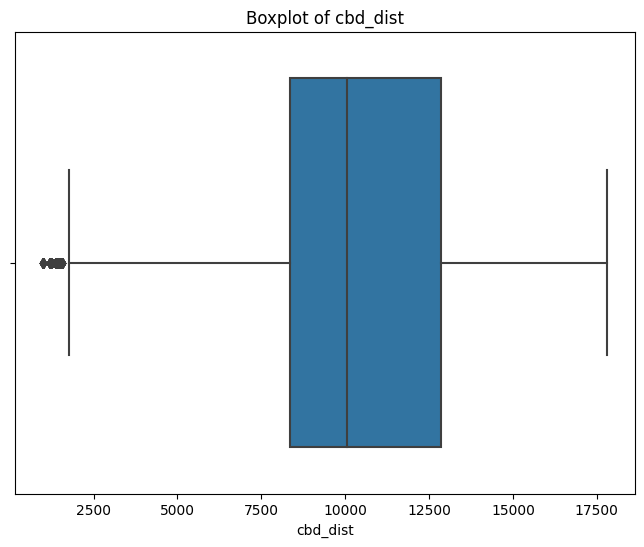

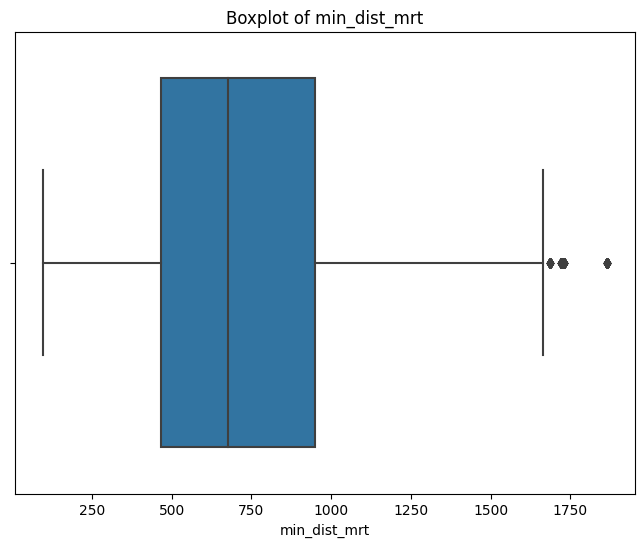

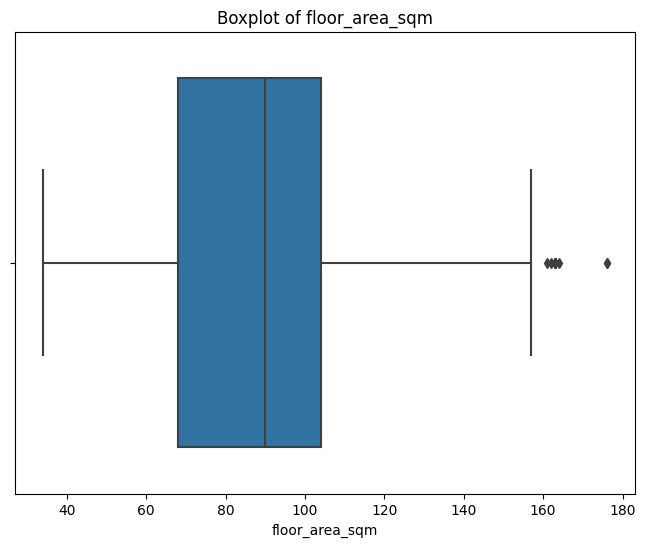

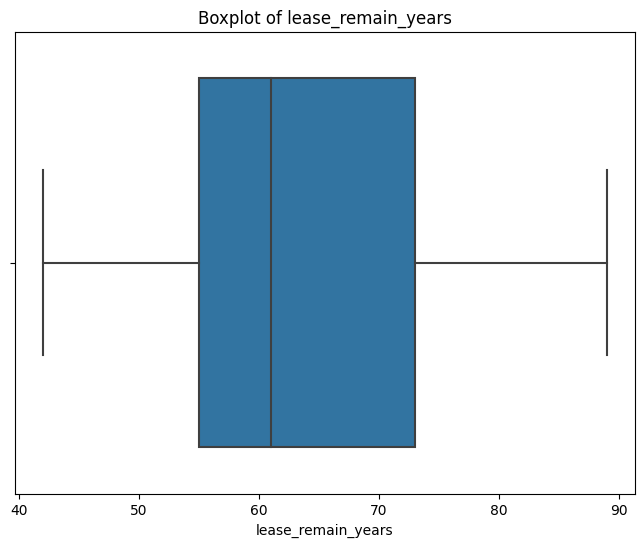

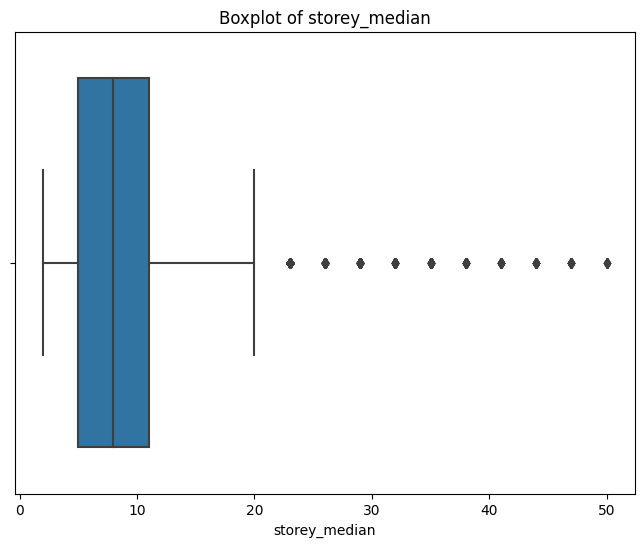

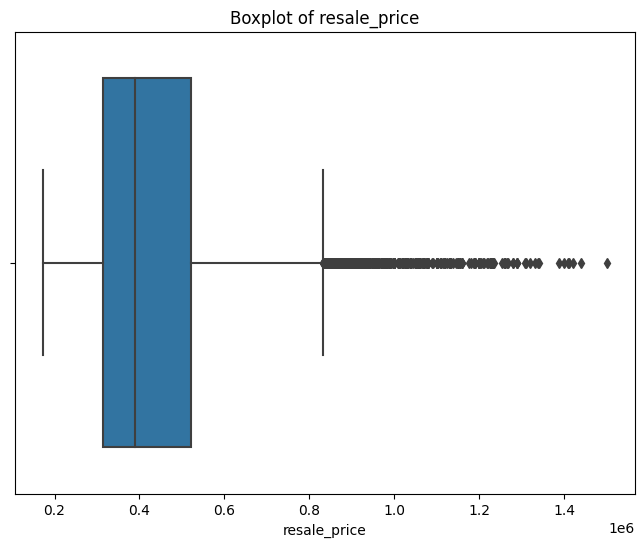

In [149]:
 #Checking and Handling for Skewness in the Data

import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=Data, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [150]:
Data1= scope_df

In [151]:
Data1

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,8740.633473,999.941595,44.0,55,11.0,232000.0
1,8740.633473,999.941595,44.0,55,11.0,235000.0
2,8740.633473,999.941595,44.0,55,2.0,202000.0
3,8740.633473,999.941595,44.0,55,2.0,210000.0
4,8740.633473,999.941595,44.0,55,8.0,220000.0
...,...,...,...,...,...,...
12016,15023.340575,587.571291,106.0,60,14.0,500000.0
12017,15023.340575,587.571291,106.0,60,8.0,465888.0
12018,15023.340575,587.571291,104.0,60,2.0,391888.0
12019,15023.340575,587.571291,104.0,60,2.0,375000.0


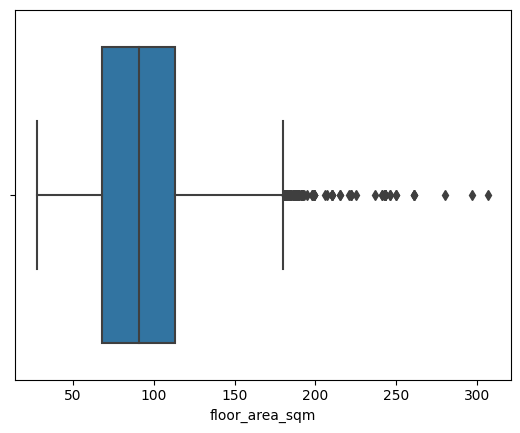

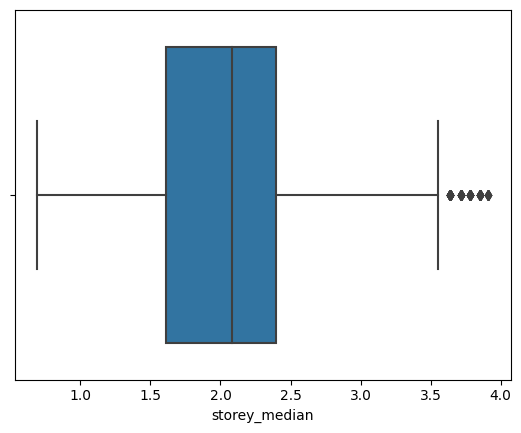

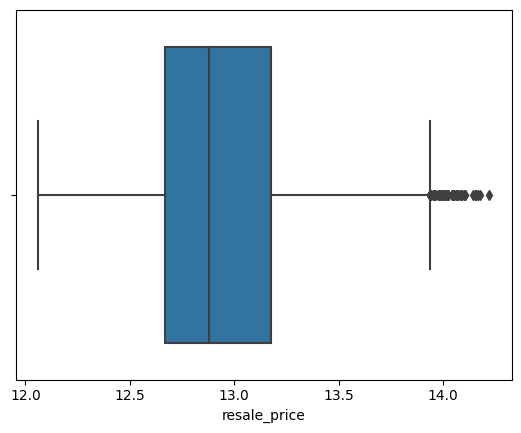

In [152]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
Data1['floor_area_sqm'] = np.log(Data1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

Data1['storey_median'] = np.log(Data1['storey_median'])
sns.boxplot(x='storey_median', data=Data1)
plt.show()

Data1['resale_price'] = np.log(Data1['resale_price'])
sns.boxplot(x='resale_price', data=Data1)
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

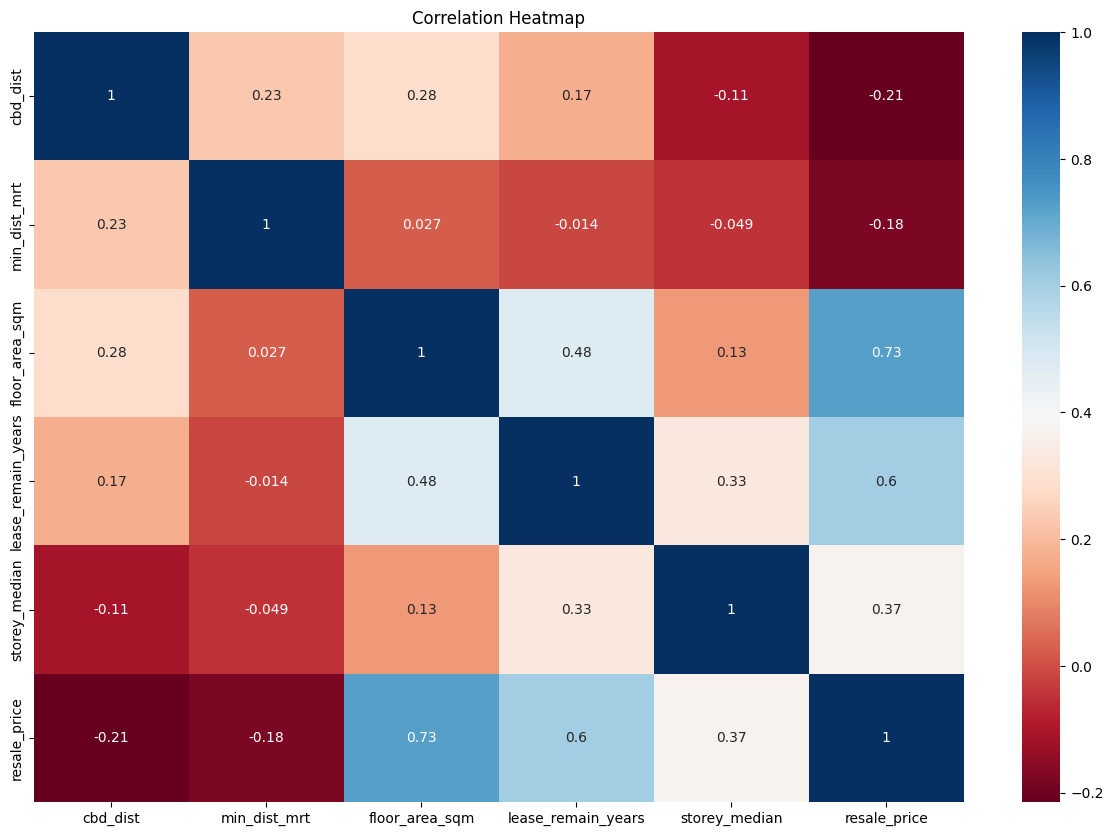

In [154]:
# Visualization among different columns using Correlation Matrix

import seaborn as sns

corrMatrix = Data1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [156]:
# Encoding Data

from sklearn.preprocessing import StandardScaler

X=Data1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=Data1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)
test_dataframe = pd.DataFrame(X)
test_dataframe

,0,1,2,3,4
0,-0.325421,0.744256,-2.533120,-0.767653,0.639060
1,-0.325421,0.744256,-2.533120,-0.767653,0.639060
2,-0.325421,0.744256,-2.533120,-0.767653,-1.716399
3,-0.325421,0.744256,-2.533120,-0.767653,-1.716399
4,-0.325421,0.744256,-2.533120,-0.767653,0.199051
...,...,...,...,...,...
11577,1.295323,-0.403708,0.800607,-0.335424,0.972274
11578,1.295323,-0.403708,0.800607,-0.335424,0.199051
11579,1.295323,-0.403708,0.728384,-0.335424,-1.716399
11580,1.295323,-0.403708,0.728384,-0.335424,-1.716399


In [157]:
# Splitting the Data for Training and Testing Purposes

from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [158]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

# Decision Tree Regressor
dtr = DecisionTreeRegressor()

In [159]:
# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [160]:
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5}


In [161]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [162]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

 
Mean squared error: 0.014963204816308006
Mean Absolute Error 0.09755648787504798
Root Mean squared error: 0.12232417919736067
 
R-squared: 0.8890498739817284


In [163]:
# Testing Our Trained Model (Decision Tree Regressor)

new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

229680.28878862274

In [ ]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)